*JJ McCauley*

# Classification on the Breast Cancer Dataset
### Optimizing a Baseline Classifier

In [2]:
''' Using Naive Bayes Classifier as Baseline, Loading Dataset, & Importing necessary dependencies '''
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

# Loading in data and splitting
loaded_bc_data = load_breast_cancer()
X = loaded_bc_data.data
y = loaded_bc_data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Printing Num of feautes for hyperparameter tuning
print(X.shape[1]) 

# Printing Loaded Data to see how data is represented
print(X, "\n", y)  # Data is standardized and targets are 0, 1, so no modification is needed

# Using Naive Bayes Classifier as accuracy baseline
nbc_model1 = GaussianNB()
nbc_model1.fit(x_train, y_train)
nbc_model1_y_pred = nbc_model1.predict(x_test)
print(f"Baseline score for nbc_model1: {nbc_model1.score(x_test, y_test)}")

30
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1

In [5]:
''' Defining Early Stopping Callback '''
# Defining an Early Stopping Function (credit to Logan Kelsch for the idea)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor Validation Accuracy
    patience=12,             # Wait 12 Epochs for Improvement
    restore_best_weights=True
)

In [ ]:
''' ANN Model '''
# Initializing ANN through tensorflow
adam_optimizier = tf.keras.optimizers.Adam(learning_rate=.001)
ANN_model1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(30,)),  # Input Layer - Each Feature to a Node
    tf.keras.layers.Dense(120, activation='relu'),  # First Dense Layer
    tf.keras.layers.Dense(30, activation='relu'),  # Second Dense Layer
    tf.keras.layers.Dense(15, activation='relu'),  # Third Dense Layer
    tf.keras.layers.Dense(2, activation='softmax'),  # Last Dense Layer, classify as yes or no
])

ANN_model1.compile(optimizer=adam_optimizier, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ANN_model1.fit(x=x_train, y=y_train, validation_data=[x_test, y_test], epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4743 - loss: 22.5972 - val_accuracy: 0.9357 - val_loss: 0.2067
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7378 - loss: 1.2829 - val_accuracy: 0.9123 - val_loss: 0.5786
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.9781 - val_accuracy: 0.9474 - val_loss: 0.2675
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8973 - loss: 0.5685 - val_accuracy: 0.9474 - val_loss: 0.1733
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8892 - loss: 0.3764 - val_accuracy: 0.9415 - val_loss: 0.1724
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8911 - loss: 0.3031 - val_accuracy: 0.9357 - val_loss: 0.2121
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9205 - loss: 0.2581 - val_accuracy: 0.8070 - val_loss: 0.4145
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8280 - loss: 0.5060 - val_accuracy: 0.9474 -

In [3]:
''' Optimizing Logicstic Regression Model '''
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")  # Ignore Warnings for grid search since some configurations are not compatible

# Running Grid Search CV on Logistic Regression to find best parameters
log_r_model = LogisticRegression(max_iter=250, random_state=42)
params = {
    'C':[i for i in np.arange(.8, 1.3, .1)],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']
}
grid_search_logr = GridSearchCV(log_r_model, params, cv=5, n_jobs=-1, error_score=np.nan)  # Supress Warnings
grid_search_logr.fit(x_train, y_train)

# Getting best estimator and finding score
print(f"Best Logistic Regression Model: {grid_search_logr.best_params_}  with score {grid_search_logr.best_score_}")
log_r_model_optimal = grid_search_logr.best_estimator_
print(f"Logistic Regression Score: {log_r_model_optimal.score(x_test, y_test)}")

Best Logistic Regression Model: {'C': 0.9, 'penalty': 'l1', 'solver': 'liblinear'}  with score 0.9521835443037976
Logistic Regression Score: 0.9649122807017544


Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



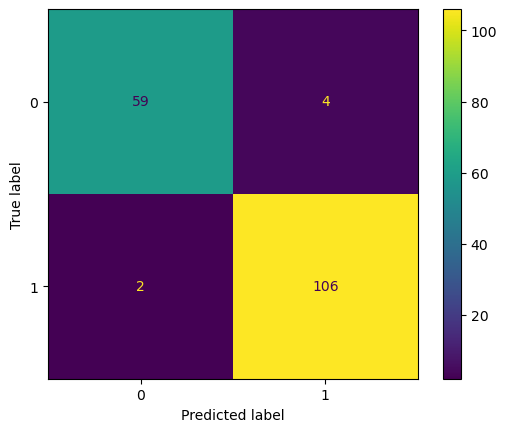

In [5]:
''' Making Classification Report + Confusion Matrix for Best Estimator (Logistic Regression) '''
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Getting Prediction from Logistic Regression Model
y_pred_1 = log_r_model_optimal.predict(x_test)

# Outputting Classification Report
print(f"Classification Report for Logistic Regression Model:\n{classification_report(y_test, y_pred_1)}")

# Displaying Confusion Matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
dispcm_1 = ConfusionMatrixDisplay(cm_1)
dispcm_1.plot()
plt.show()

### Optimizing Ensemble Classifier

In [6]:
''' Using Random Forest '''
from sklearn.ensemble import RandomForestClassifier

# Creating Classifier
rand_forest_model_1 = RandomForestClassifier(n_jobs=-1, random_state=42)

# Finding optimal parameters using GridSearchCV
params = {
    'n_estimators': [i for i in range(100, 600, 100)],  # Tuned as needed
    'max_depth': [i for i in range(10, 100, 10)],
    'min_samples_split': [i for i in range(2, 11, 1)],
    'min_samples_leaf': [i for i in range(1, 6, 1)]
}
grid_search_rf = GridSearchCV(rand_forest_model_1, params, cv=5, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)
print(f"Best Parameters: {grid_search_rf.best_estimator_}")
print(f"Best Score: {grid_search_rf.best_score_}")

''' Output:
Best Parameters: RandomForestClassifier(max_depth=10, min_samples_split=8, n_jobs=-1,
                       random_state=42)
Best Score: 0.9572784810126581
'''

Best Parameters: RandomForestClassifier(max_depth=10, min_samples_split=8, n_jobs=-1,
                       random_state=42)
Best Score: 0.9572784810126581


' Output:\nBest Parameters: max_depth=10, min_samples_leaf=2, min_samples_split=6, n_jobs=-1, random_state=42\nBest Score: 0.9631268436578171\n'

Best Parameters: RandomForestClassifier(max_depth=9, min_samples_split=7, n_estimators=200,
                       n_jobs=-1, random_state=42)
Best Score: 0.9547468354430378
Optimizing Random Forest Score: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



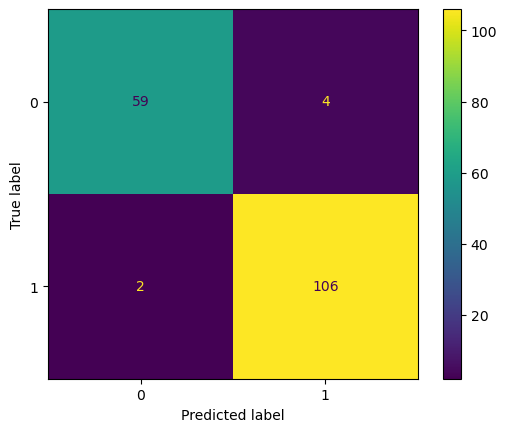

In [7]:
''' Further optimizing model & outputting metrics '''
params_2 = {
    'max_depth': [i for i in range(8, 15, 1)],
    'n_estimators': [i for i in range(200, 600, 100)],  # Limited due to computational expendenture
    'min_samples_split': [i for i in range(5, 8)]
}
grid_search_rf_2 = GridSearchCV(rand_forest_model_1, params_2, cv=5, n_jobs=-1)
grid_search_rf_2.fit(x_train, y_train)
print(f"Best Parameters: {grid_search_rf_2.best_estimator_}")
print(f"Best Score: {grid_search_rf_2.best_score_}")
rand_forest_model_optimal_1 = grid_search_rf_2.best_estimator_
print(f"Optimizing Random Forest Score: {rand_forest_model_optimal_1.score(x_test, y_test)}")
y_pred_rf_1 = rand_forest_model_optimal_1.predict(x_test)
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf_1)}")
cm = confusion_matrix(y_test, y_pred_rf_1)
cmDisp2 = ConfusionMatrixDisplay(cm)
cmDisp2.plot()
plt.show()

# Classification of Attached Dataset

### Gathering & Standardizing Data

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Extract Features and Targets
attached_df = pd.read_csv("Project3_Dataset.csv")
X = attached_df.iloc[:, :-1]  # Extract columns 1-65 (features)
y = attached_df.iloc[:, -1]  # Extract column 66 (target)

# Normalizing features using standard scaler
scaler = StandardScaler()
normalized_X = scaler.fit_transform(X)

# Printing some of new X to ensure transformation
print(normalized_X[5])

# Splitting into training & testing data
x_train, x_test, y_train, y_test = train_test_split(normalized_X, y, test_size=.2, random_state=42)

[-0.48632392 -1.72816419 -0.77640482 -0.45309111 -0.35412975  0.70673541
 -0.40893094  2.67917685  0.3929992  -0.24783755 -0.16053869 -0.77736335
 -0.71727488 -0.53322342 -0.82927637 -0.62487059 -0.6828818  -0.35615409
 -0.66454867 -0.55384128 -0.48149559 -0.64713678 -1.07596197 -0.40003878
 -0.51907075 -0.89653917 -0.62866023 -0.59188275 -0.98235003 -0.89097806
 -0.72391784 -0.72802959 -0.71613004 -0.55265327 -0.48436601 -0.97367098
 -1.01537682 -0.7237145   1.19573131  0.32055711  1.40193256  0.20214644
 -0.49480525  0.26937334  0.490303    0.38128607  0.17114468 -0.02921831
 -0.06706976 -0.08878676 -0.22696959 -0.52118647  1.83335549  0.36296114
  0.89839577  0.32980398 -0.29314867 -0.04231752  0.57338166  1.40470933
  1.41983513  1.25572074  0.5054956   0.16766576 -0.01308024]


### Finding Best Baseline Classifier

In [5]:
''' Utilizing Naive Bayes Classifier as Baseline Accuracy '''
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nbc_model2 = GaussianNB()
nbc_model2.fit(x_train, y_train)
nbc_model2_y_pred = nbc_model2.predict(x_test)
print("Naive Bayes Accuracy Score: ", accuracy_score(y_test, nbc_model2_y_pred))

Naive Bayes Accuracy Score:  0.65


In [22]:
''' Logistic Regression Model '''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")  # Ignore Warnings for grid search since some configurations are not compatible

# Running Grid Search CV on Logistic Regression to find best parameters
log_r_model2 = LogisticRegression(max_iter=250, random_state=42)
params = {
    'C':[i for i in np.arange(.1, .8, .1)],  # Tweaked after testing
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']
}
grid_search_logr2 = GridSearchCV(log_r_model2, params, cv=5, n_jobs=-1, error_score=np.nan)  # Supress Warnings
grid_search_logr2.fit(x_train, y_train)

# Getting best estimator and finding score
print(f"Best Logistic Regression Model: {grid_search_logr2.best_params_}  with score {grid_search_logr2.best_score_}")
log_r_model_optimal2 = grid_search_logr2.best_estimator_
print(f"Logistic Regression Score: {log_r_model_optimal2.score(x_test, y_test)}")

Best Logistic Regression Model: {'C': 0.7000000000000001, 'penalty': 'l2', 'solver': 'saga'}  with score 0.6407258064516128
Logistic Regression Score: 0.7


In [3]:
''' Attempting SVM to acheive higher accuracy than Logistic Regression '''
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Creating Grid Search to later be tweaked
params_3 = {
    'C': [i for i in range(100, 200, 10)],  # Tweaked
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'degree': [2, 3],
    'class_weight': [None, 'balanced'],
}
svc_model = SVC()
grid_search_svc = GridSearchCV(svc_model, params_3, cv=5, n_jobs=-1)
grid_search_svc.fit(x_train, y_train)

# Getting best estimator
print(f"Best SVC Model: {grid_search_svc.best_params_} with score {grid_search_svc.best_score_}")
svc_model_optimal = grid_search_svc.best_estimator_
print(f"SVM Score: {svc_model_optimal.score(x_test, y_test)}")

Best SVC Model: {'C': 180, 'class_weight': None, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'} with score 0.6471774193548386
SVM Score: 0.6


In [90]:
''' ANN Model '''
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Ensuring that target labels are properly encoded
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Defining Tensorflow Callbacks & Optimizer
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)  # Stop early if validation loss doesn't improve
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)  # Reduce Learning Rate as validation loss plateaus for faster training
rmsprop_optimizier = tf.keras.optimizers.RMSprop(learning_rate=.001)
adam_optimizier = tf.keras.optimizers.Adam(learning_rate=.001)

# Creating the model
ANN_model2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(65,)),  # Input Layer - Each Feature to a Node
    tf.keras.layers.Dense(65, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(.05)),  # First Dense Layer
    tf.keras.layers.BatchNormalization(),  # Normalize layer
    tf.keras.layers.Dropout(.5),  # Drop out 50% of data to mitigate overfitting
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(.03)),  # Second Dense Layer
    tf.keras.layers.BatchNormalization(),  # Normalize layer
    tf.keras.layers.Dropout(.35),  # Drop out 35% of data to mitigate overfitting
    #tf.keras.layers.Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(.03)),  # Third Dense Layer
    tf.keras.layers.Dense(20, activation='softmax'),  # Last Dense Layer, classify as yes or no
])

ANN_model2.compile(optimizer=adam_optimizier, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = ANN_model2.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=32, 
               verbose=1, callbacks=[early_stopping, lr_scheduler])

# Printing the best validation accuracy
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Best Validation Accuracy: {best_val_accuracy}")

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.0639 - loss: 8.2539 - val_accuracy: 0.0500 - val_loss: 7.4577 - learning_rate: 0.0010
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0812 - loss: 7.9310 - val_accuracy: 0.0750 - val_loss: 7.3274 - learning_rate: 0.0010
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0790 - loss: 7.8263 - val_accuracy: 0.1250 - val_loss: 7.2080 - learning_rate: 0.0010
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0648 - loss: 7.3820 - val_accuracy: 0.1500 - val_loss: 7.0949 - learning_rate: 0.0010
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0496 - loss: 7.3411 - val_accuracy: 0.1500 - val_loss: 6.9850 - learning_rate: 0.0010
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1533 - loss: 7.0662 - val_accuracy: 0.1500 - val_loss: 6.8770 - learning_rate: 0.0010
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1125 - loss: 7.0846 - val_accuracy:

In [133]:

#ANN_model2.save('875-valaccuracy-1.keras')
from tensorflow.keras.models import load_model
import numpy as np

loaded_ANN_model = load_model('875-valaccuracy-1.keras')
loaded_ANN_model.summary()

# Subtracting 1 from y-test to align with ANN labels
y_test_new = y_test - 1

# Getting model evaluation of optimized ANN
test_loss, test_accuracy = loaded_ANN_model.evaluate(x_test, y_test_new, verbose=1)
print(f"ANN Independent Test Accuracy: {test_accuracy}")

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_122 (Dense)               │ (None, 65)             │         4,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 65)             │           260 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 32)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,964 (85.80 KB)

 Trainable params: 7,256 (28.34 KB)

 Non-trainable params: 194 (776.00 B)

 Optimizer params: 14,514 (56.70 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7875 - loss: 1.0125  
ANN Independent Test Accuracy: 0.7749999761581421


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.33      0.25      0.29         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.0

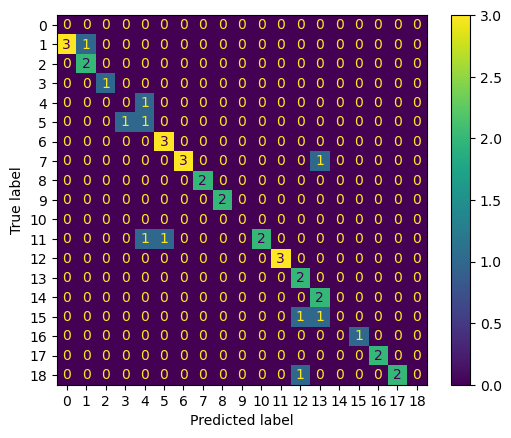

In [136]:
''' Showing Classification Report & Confusion Matrix for ANN Model '''
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Retreive predictions from ANN
y_pred_ANN2_prob = loaded_ANN_model.predict(x_test)  # This produces probabilities of each class
y_pred_ANN2 = np.argmax(y_pred_ANN2_prob, axis=1)  # Convert to class labels

print(classification_report(y_test, y_pred_ANN2))
cm = confusion_matrix(y_test, y_pred_ANN2)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Finding Best Essemble Classifier

In [ ]:
''' Making Random Forest Ensemble Method using previous data '''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Creating Classifier
rand_forest_model_2 = RandomForestClassifier(n_jobs=-1, random_state=42)

# Finding optimal parameters using GridSearchCV
params_rf2 = {
    'n_estimators': [i for i in range(200, 500, 100)],  # Tuned as needed
    'max_depth': [i for i in range(10, 17, 1)],
    'min_samples_split': [4, 5],
}
grid_search_rf2_ = GridSearchCV(rand_forest_model_2, params_rf2, cv=5)
grid_search_rf2_.fit(x_train, y_train)
print(f"Best Parameters: {grid_search_rf2_.best_estimator_}")
print(f"Best Score: {grid_search_rf2_.best_score_}")

In [96]:
''' Boosting Ensemble Method '''
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(n_jobs=-1, random_state=42)
params_xgb = {
    'n_estimators': [i for i in range(170, 200, 10)],
    'max_depth': [i for i in range(1, 5)],
    'learning_rate': [0.1],
    'subsample': [i for i in np.arange(.7, .9, .1)],
    'colsample_bytree': [i for i in np.arange(.7, 1.5, .1)]
}

# Using grid search to test parameters
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=params_xgb, cv=3, verbose=1, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)
print(f"Best XGBoost Parameters: {grid_search_xgb.best_params_} with score {grid_search_xgb.best_score_}")
best_xgb_model = grid_search_xgb.best_estimator_
print(f"Independent Test Accuracy: {accuracy_score(y_test, best_xgb_model.predict(x_test))}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best XGBoost Parameters: {'colsample_bytree': 0.9999999999999999, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180, 'subsample': 0.7999999999999999} with score 0.6025641025641026
Independent Test Accuracy: 0.525


In [142]:
''' Ensemble of ANN (this took forever to implement & doesn't quite work) '''
import tensorflow as tf
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample

def create_model():
    # Building the same model as previously
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(shape=(65,)),  # Input Layer - Each Feature to a Node
        tf.keras.layers.Dense(65, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(.05)),  # First Dense Layer
        tf.keras.layers.BatchNormalization(),  # Normalize layer
        tf.keras.layers.Dropout(.5),  # Drop out 50% of data to mitigate overfitting
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(.03)),  # Second Dense Layer
        tf.keras.layers.BatchNormalization(),  # Normalize layer
        tf.keras.layers.Dropout(.35),  # Drop out 35% of data to mitigate overfitting
        tf.keras.layers.Dense(20, activation='softmax'),  # Last Dense Layer
    ])
    return model

n_models = 20
models = []

# Training various models with resampled data
for i in range(n_models):
    print(f"Training Model {i}")
    # Gather resampled data
    x_resampled, y_resampled = resample(x_train, y_train, random_state=i)
    y_resampled = y_resampled-1  # Convert to trainable format
    # Training the model with resampled data
    model = create_model()
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_resampled, y_resampled, epochs=200, batch_size=32, verbose=0)
    models.append(model)

# Getting emsemble prediction
predictions = np.zeros((x_test.shape[0], 20))  # Acts as accumulator of class probabilities predicted by ANNS
for model in models:
    predictions += model.predict(x_test)
# Get the final prediction (class with highest predictions)
final_predictions = np.argmax(predictions, axis=1)

# Evaluating the model
ensemble_accuracy = accuracy_score(y_test, final_predictions+1)
print(f"Essemble Independent Accuracy: {ensemble_accuracy}")


Training Model 0
Training Model 1
Training Model 2
Training Model 3
Training Model 4
Training Model 5
Training Model 6
Training Model 7
Training Model 8
Training Model 9
Training Model 10
Training Model 11
Training Model 12
Training Model 13
Training Model 14
Training Model 15
Training Model 16
Training Model 17
Training Model 18
Training Model 19
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 

              precision    recall  f1-score   support

           2       1.00      0.75      0.86         4
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.33      0.50      0.40         2
           7       1.00      0.67      0.80         3
           8       1.00      0.50      0.67         4
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         2
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         3
          14       0.67      1.00      0.80         2
          15       0.33      0.50      0.40         2
          16       0.50      0.50      0.50         2
          17       0.50      1.00      0.67         1
          18       0.00      0.00      0.00         2
          19       0.67      0.67      0.67         3
          20       0.00    

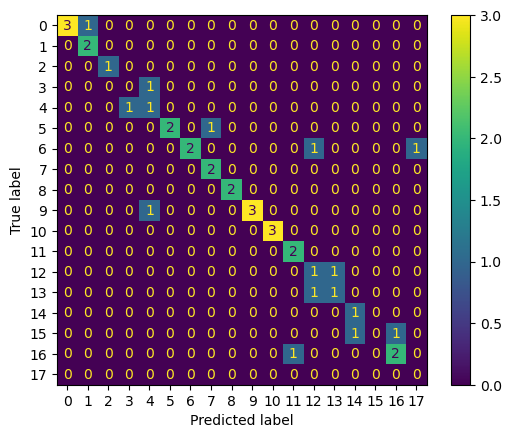

In [144]:
''' Printing classification report & confusion matrix '''

print(classification_report(y_test, final_predictions+1))
cm = confusion_matrix(y_test, final_predictions+1)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [123]:
''' Ensemble Method - Bagging '''
from sklearn.ensemble import BaggingClassifier

# Using optimized logistic regression from above with bagging
bagging_model = BaggingClassifier(base_estimator=log_r_model_optimal2, random_state=42)
bagging_model.fit(x_train, y_train)
y_pred_bagging = bagging_model.predict(x_test)

# Evaluating performance of model
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Independent Test Bagging Accuracy: {bagging_accuracy}")

Independent Test Bagging Accuracy: 0.625
